### Treść zadania

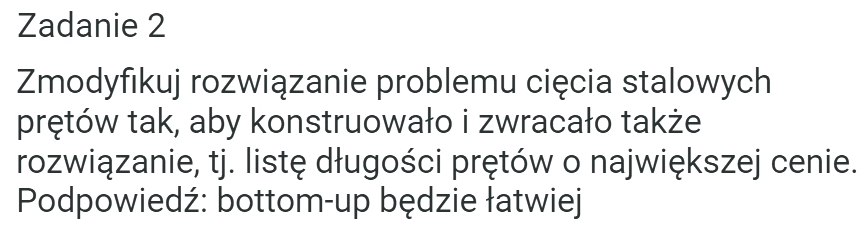

### Omówienie rozwiązania

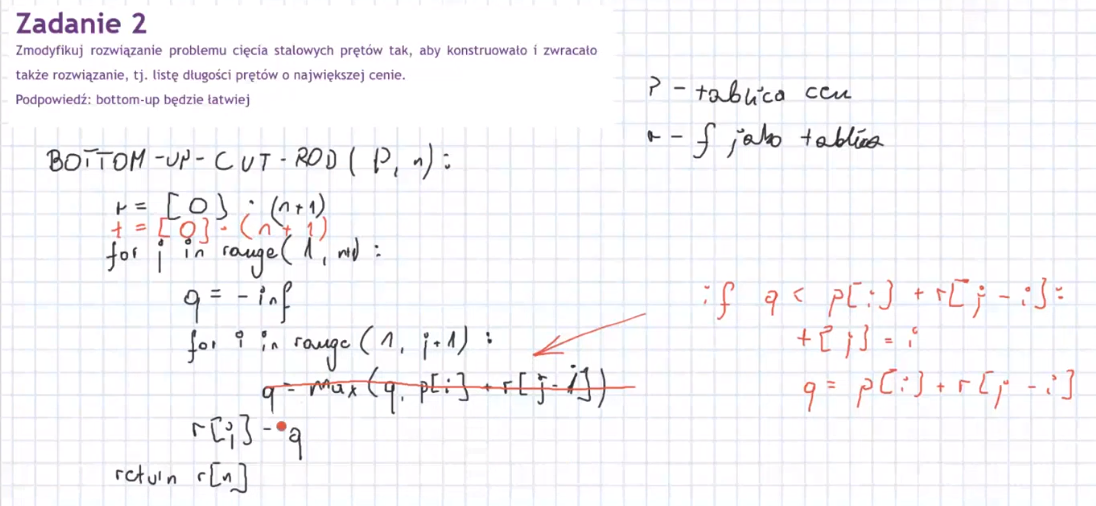

Tworzymy dodatkową tablicę $ prev $, w której pod indeksem $ i $ zapamiętujemy długość poprzedniego fragmentu, dla którego uzyskaliśmy największy profit. Wówczas wystarczy odtworzyć długości wziętych fragmentów, przechodząc od końca tablicy (indeksu $ n $), skacząc do za każdym razem do indeksu, zapisanego pod indeksem, na którym się znajdujemy w danym momencie.

### Implementacja

#### Bottom-up

In [1]:
def cut_rod(P: 'profits', n: 'length of a rod to cut'):
    cache = [0] * (n + 1)
    prev = [0] * (n + 1)
    cache[1] = P[1]
    
    for i in range(1, n + 1):
        for j in range(i + 1):
            if cache[i] < cache[j] + P[i - j]:
                cache[i] = cache[j] + P[i - j]
                prev[i] = j

    taken = []
    i = n
    while i > 0:
        taken.append(i - prev[i])
        i = prev[i]

    return cache[n], taken

###### Kilka testów

In [2]:
import random

# P = [0, 1, 3, 6, 5, 3]  # Zaczynamy od wartości zero, bo dla pręta o długości 0 nie mamy zysku
P = [0] + [random.randint(i, i * 2) for i in range(1, 20, 5) for _ in range(random.randint(0, 5))] 
n = len(P) - 1

print('Input:', P)
print('Rod length:', n)
profit, taken = cut_rod(P, n)
print('\nProfit:', profit)
print('Parts (lengths):', taken)
print('Are parts correct?:', sum(P[i] for i in taken) == profit)

Input: [0, 2, 1, 1, 2, 1, 12, 11, 11, 11, 13, 11, 19, 32, 23, 24, 19, 20]
Rod length: 17

Profit: 40
Parts (lengths): [13, 1, 1, 1, 1]
Are parts correct?: True


#### Top-down

In [3]:
def cut_rod(P: 'profits', n: 'length of a rod to cut'):
    cache = [0] * (n + 1)
    cache[1] = P[1]
    prev = [0] * (n + 1)
    
#     iters = 0
    
    def cut(m: 'length of a current part of a rot to cut'):
#         nonlocal iters
#         iters += 1
        if m == 0: return 0
        if cache[m]: return cache[m]
        
        for i in range(1, m + 1):
            res = P[i] + cut(m - i)
            if res > cache[m]:
                cache[m] = res
                prev[m] = m - i
        return cache[m]
       
    cut(n)
#     print('Iterations', iters, 'n^2', n ** 2)
    
    taken = []
    i = n
    while i > 0:
        taken.append(i - prev[i])
        i = prev[i]
    
    return cache[-1], taken

###### Kilka testów

In [4]:
import random

# P = [0, 1, 3, 6, 5, 3]  # Zaczynamy od wartości zero, bo dla pręta o długości 0 nie mamy zysku
P = [0] + [random.randint(i, i * 2) for i in range(1, 20, 5) for _ in range(random.randint(0, 5))] 
n = len(P) - 1

print('Input:', P)
print('Rod length:', n)
profit, taken = cut_rod(P, n)
print('\nProfit:', profit)
print('Parts (lengths):', taken)
print('Are parts correct?:', sum(P[i] for i in taken) == profit)

Input: [0, 2, 1, 2, 2, 11, 7, 10, 29, 21, 22, 25]
Rod length: 11

Profit: 35
Parts (lengths): [1, 1, 1, 8]
Are parts correct?: True
